In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Income Category Distribution')

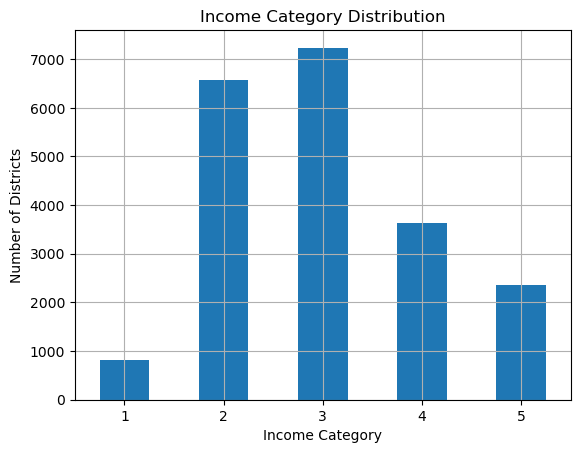

In [2]:
df = pd.read_csv("housing.csv")
df["income_cat"] = pd.cut(
    df["median_income"],
    bins=[0, 1.5, 3.0, 4.5, 6.0, float("inf")],
    labels=[1, 2, 3, 4, 5],
)

df["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.title("Income Category Distribution")

In [3]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df["income_cat"]):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]

In [4]:
for sett in (strat_train_set, strat_test_set):
    sett.drop("income_cat", axis=1, inplace=True)

In [5]:
df = strat_train_set.copy()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN


In [6]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
housing = df.drop("median_house_value", axis=1)
housing_labels = df["median_house_value"].copy()

In [8]:
housing_labels

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64

In [9]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [10]:
from sklearn.impute import SimpleImputer

In [11]:
imputer = SimpleImputer(strategy="median")

In [12]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [13]:
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [14]:
X = imputer.transform(housing_num)

In [15]:
X

array([[-1.2146e+02,  3.8520e+01,  2.9000e+01, ...,  2.2370e+03,
         7.0600e+02,  2.1736e+00],
       [-1.1723e+02,  3.3090e+01,  7.0000e+00, ...,  2.0150e+03,
         7.6800e+02,  6.3373e+00],
       [-1.1904e+02,  3.5370e+01,  4.4000e+01, ...,  6.6700e+02,
         3.0000e+02,  2.8750e+00],
       ...,
       [-1.2272e+02,  3.8440e+01,  4.8000e+01, ...,  4.5800e+02,
         1.7200e+02,  3.1797e+00],
       [-1.2270e+02,  3.8310e+01,  1.4000e+01, ...,  1.2080e+03,
         5.0100e+02,  4.1964e+00],
       [-1.2214e+02,  3.9970e+01,  2.7000e+01, ...,  6.2500e+02,
         1.9700e+02,  3.1319e+00]])

In [16]:
housing = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964
...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964


In [17]:
housing["ocean_proximity"] = df["ocean_proximity"]

In [18]:
housing = housing[['ocean_proximity']]

In [19]:
housing

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
...,...
15174,<1H OCEAN
12661,INLAND
19263,<1H OCEAN
19140,<1H OCEAN


In [20]:
set(housing["ocean_proximity"])

{'<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'}

In [21]:
# from sklearn.preprocessing import OrdinalEncoder
# ordinal_encoder = OrdinalEncoder()
# housing_cat = ordinal_encoder.fit_transform(housing)
# housing_cat = pd.DataFrame(housing_cat, columns=housing.columns, 
#                            index=housing.index)
# housing_cat

In [22]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
housing_cat = onehot_encoder.fit_transform(housing)
# housing_cat.categories_
housing_cat.toarray()
# housing_cat = pd.DataFrame(housing_cat.toarray(), 
#                            columns=onehot_encoder.get_feature_names_out(),
#                            index=housing.index)

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [23]:
housing_cat

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [24]:
housing_cat = pd.DataFrame(
    housing_cat.toarray(),
    columns=["<1H OCEAN", "INLAND", "ISLAND", "NEAR BAY", "NEAR OCEAN"],
    index=housing.index
)

In [25]:
housing_cat

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,0.0,1.0,0.0,0.0,0.0
15502,0.0,0.0,0.0,0.0,1.0
2908,0.0,1.0,0.0,0.0,0.0
14053,0.0,0.0,0.0,0.0,1.0
20496,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
15174,1.0,0.0,0.0,0.0,0.0
12661,0.0,1.0,0.0,0.0,0.0
19263,1.0,0.0,0.0,0.0,0.0
19140,1.0,0.0,0.0,0.0,0.0


In [28]:
df = pd.concat([df, housing_cat], axis=1)
df.drop("ocean_proximity", axis=1, inplace=True)

In [29]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
